#Dream-ifying an Image
Pareidolia: https://en.wikipedia.org/wiki/Pareidolia?ref=mlq.ai






# Import relevant libraries

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
tf.__version__

'2.15.0'

#Loading the pre-built neural network

In [5]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

87910968/87910968 [==============================] - 3s 0us/step


In [6]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalizati

In [7]:
len(base_model.layers)

311

In [8]:
# Relu activation function returns 0 if it receives a negative number and return the number itself if positive
#names = ['mixed3', 'mixed5', 'mixed8', 'mixed9']
names = ['mixed3', 'mixed5']

In [9]:
base_model.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>

In [10]:
layers = [base_model.get_layer(name).output for name in names]

In [11]:
layers

[<KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed3')>,
 <KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed5')>]

In [12]:
deep_dream_model = tf.keras.Model(inputs=base_model.input, outputs= layers)

In [13]:
deep_dream_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0][0

# Load and pre-processing the dataset


In [14]:
img1 = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/flowers.jpg', target_size=(225, 375))
img2 = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/sky1024px.jpg', target_size=(225, 375))

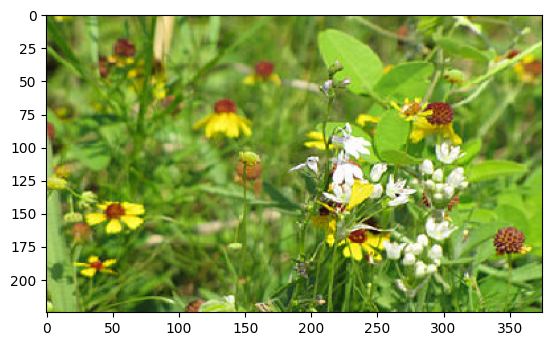

In [15]:
plt.imshow(img1);

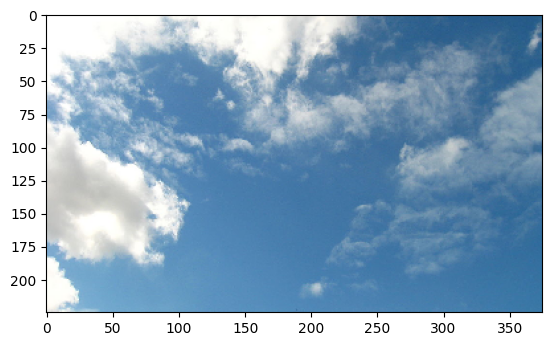

In [16]:
plt.imshow(img2);

In [17]:
type(img1), type(img2)

(PIL.Image.Image, PIL.Image.Image)

In [18]:
img1.size, img2.size, img1.mode, img2.mode, len(img1.mode), len(img2.mode)

((375, 225), (375, 225), 'RGB', 'RGB', 3, 3)

In [19]:
list(img1.getdata())

[(76, 112, 22),
 (66, 102, 12),
 (62, 97, 7),
 (62, 97, 7),
 (78, 107, 17),
 (107, 128, 23),
 (145, 156, 18),
 (186, 189, 10),
 (216, 215, 3),
 (205, 201, 18),
 (205, 201, 18),
 (191, 186, 6),
 (169, 166, 0),
 (163, 161, 0),
 (163, 164, 0),
 (153, 154, 0),
 (141, 143, 0),
 (141, 143, 0),
 (144, 146, 3),
 (104, 126, 17),
 (97, 119, 21),
 (95, 119, 33),
 (108, 133, 49),
 (121, 147, 56),
 (121, 147, 56),
 (125, 149, 53),
 (123, 143, 46),
 (121, 138, 46),
 (113, 137, 39),
 (112, 145, 41),
 (116, 160, 49),
 (116, 160, 49),
 (129, 182, 68),
 (150, 203, 95),
 (164, 211, 117),
 (160, 199, 120),
 (151, 182, 114),
 (151, 182, 114),
 (121, 149, 72),
 (112, 141, 49),
 (108, 139, 35),
 (105, 134, 26),
 (96, 122, 23),
 (93, 116, 28),
 (93, 116, 28),
 (96, 116, 31),
 (92, 112, 25),
 (99, 109, 40),
 (100, 110, 39),
 (101, 111, 40),
 (103, 111, 38),
 (103, 111, 38),
 (105, 113, 38),
 (109, 115, 41),
 (113, 120, 43),
 (116, 123, 46),
 (114, 125, 47),
 (114, 125, 46),
 (114, 125, 46),
 (113, 125, 41),
 (

In [20]:
list(img2.getdata())

[(255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 253),
 (255, 255, 253),
 (255, 255, 253),
 (255, 255, 253),
 (255, 255, 253),
 (255, 255, 253),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255

In [21]:
# image 1
#img1 = img1/255
img1 = tf.keras.preprocessing.image.img_to_array(img1)
img1 = tf.keras.applications.inception_v3.preprocess_input(img1)

In [22]:
img1.shape, type(img1), img1.min(), img1.max()

((225, 375, 3), numpy.ndarray, -1.0, 1.0)

In [23]:
# image 2
#img2 = np.array(img2)/255.0
img2 = tf.keras.preprocessing.image.img_to_array(img2)
img2 = tf.keras.applications.inception_v3.preprocess_input(img2)

In [24]:
img2.shape, type(img2), img2.min(), img2.max()

((225, 375, 3), numpy.ndarray, -0.7254902, 1.0)

# Getting the activation

In [25]:
img1_batch = tf.expand_dims(img1, axis=0)

In [26]:
img1_batch.shape

TensorShape([1, 225, 375, 3])

In [27]:
img2_batch = tf.expand_dims(img2, axis=0)

In [28]:
img2_batch.shape

TensorShape([1, 225, 375, 3])

In [29]:
activations1 = deep_dream_model.predict(img1_batch)

1/1 [==============================] - 3s 3s/step


In [30]:
activations2 = deep_dream_model.predict(img2_batch)

1/1 [==============================] - 0s 22ms/step


In [31]:
len(activations1), len(activations2)

(2, 2)

In [32]:
deep_dream_model.output

[<KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed3')>,
 <KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed5')>]

In [33]:
activations1[0], activations1[1] # application of the mixed 3 and 5

(array([[[[0.        , 0.00538098, 0.        , ..., 2.0547926 ,
           1.4655759 , 1.464073  ],
          [0.        , 0.28791487, 0.61859965, ..., 2.0547926 ,
           1.7953601 , 0.6310879 ],
          [0.        , 0.        , 0.17523332, ..., 1.975129  ,
           1.2142075 , 0.01942259],
          ...,
          [0.        , 0.6361501 , 0.65417707, ..., 0.93786776,
           0.        , 0.        ],
          [0.2432284 , 0.        , 2.1829317 , ..., 0.93786776,
           0.        , 0.22587776],
          [0.        , 0.        , 0.36845645, ..., 0.75171363,
           0.        , 0.86516887]],
 
         [[0.        , 2.7011216 , 4.104348  , ..., 1.4822427 ,
           0.        , 0.42858505],
          [0.62486655, 0.9460685 , 0.        , ..., 1.1845235 ,
           0.96698624, 0.32853484],
          [2.4008732 , 0.        , 1.238491  , ..., 1.975129  ,
           1.4884974 , 0.        ],
          ...,
          [0.5724323 , 0.        , 0.        , ..., 0.93786776,
   

In [34]:
activations2[0], activations2[1] # application of the mixed 3 and 5

(array([[[[0.        , 0.        , 0.        , ..., 0.02289814,
           0.75457954, 0.08639518],
          [0.        , 0.        , 0.6583985 , ..., 0.89354986,
           0.95852745, 0.4834933 ],
          [0.        , 0.        , 0.07106955, ..., 1.148174  ,
           0.95852745, 0.4834933 ],
          ...,
          [0.        , 0.        , 0.22980672, ..., 0.3338557 ,
           0.42461124, 0.        ],
          [0.        , 0.        , 0.16091144, ..., 0.53575486,
           0.        , 0.        ],
          [0.33322778, 0.        , 0.        , ..., 0.5768994 ,
           0.        , 0.58934736]],
 
         [[0.        , 0.09998736, 1.567869  , ..., 1.0431849 ,
           1.5106733 , 0.9614275 ],
          [0.        , 0.        , 0.28502673, ..., 0.89354986,
           0.264905  , 0.21341641],
          [0.        , 0.        , 1.236981  , ..., 1.148174  ,
           0.02240827, 0.        ],
          ...,
          [0.18415773, 0.        , 0.7357182 , ..., 0.63574487,
   

In [35]:
activations1[0].shape, activations1[1].shape

((1, 12, 21, 768), (1, 12, 21, 768))

In [36]:
activations2[0].shape, activations2[1].shape

((1, 12, 21, 768), (1, 12, 21, 768))

# Calculating the deep dream loss or error of the deep dream

In [37]:
# returns the average of the first layer and the second layer
# mixed3 and mixed 5
def calculate_loss(image, network):
  image_batch = tf.expand_dims(image, axis = 0)
  activations = network(image_batch)

  losses = []
  for act in activations:
    loss = tf.math.reduce_mean(act)
    losses.append(loss)

  #print(losses)
  #print(np.shape(losses))
  #print(tf.reduce_sum(losses))

  return tf.reduce_sum(losses)

In [38]:
loss = calculate_loss(img1, deep_dream_model)

In [39]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.70706993>

# Calculate the gradient ascent



In [40]:
# Compare the activations with the pixels
# Emphasize parts of the image
# Change the pixels of the input image
@tf.function
def deep_dream(network, image, learning_rate):
  with tf.GradientTape() as tape:
    tape.watch(image)
    loss = calculate_loss(image, network)

  gradients = tape.gradient(loss, image) # Derivate
  gradients /= tf.math.reduce_std(gradients)
  image = image + gradients * learning_rate
  image = tf.clip_by_value(image, -1, 1)

  return loss, image

In [41]:
# To inverse transform the data
def inverse_transform(image):
  image = 255 * (image + 1.0) / 2.0
  return tf.cast(image, tf.uint8)

In [42]:
def run_deep_dream(network, image, epochs, learning_rate):
  for epoch in range(epochs):
    loss, image = deep_dream(network, image, learning_rate)

    if epoch % 200 == 0:
      plt.figure(figsize=(12,12))
      plt.imshow(inverse_transform(image))
      plt.show()
      print('Epoch {}, loss {}'.format(epoch, loss))

# Generate Images

In [43]:
img1.shape, type(img1)

((225, 375, 3), numpy.ndarray)

In [44]:
img2.shape, type(img2)

((225, 375, 3), numpy.ndarray)

In [45]:
run_deep_dream(network=deep_dream_model, image=img1, epochs = 8000, learning_rate=0.0001)

Output hidden; open in https://colab.research.google.com to view.

In [51]:
run_deep_dream(network=deep_dream_model, image=img2, epochs = 8000, learning_rate=0.0001)

Output hidden; open in https://colab.research.google.com to view.